QUESTION 1 : Determine the PDF and CDF of X, where X is a random variable representing the number of faculty of all ranks at a college, and use this information to calculate the probability of a college having fewer than 20 faculty of all ranks?

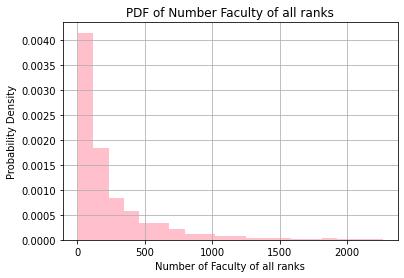

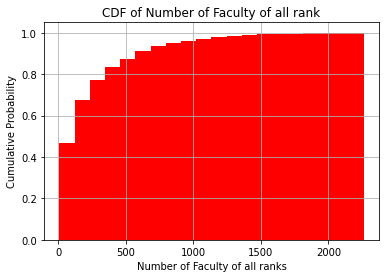

Probability that a college has fewer than 20 faculty of all rank: 0.008613264427217916


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/aaup.data"
df=pd.read_csv(url, header=None, names=["FICE","College","State","Type","Salary_Full","Salary_Assoc","Salary_Asst","Salary_All","Comp_Full","Comp_Assoc","Comp_Asst","Comp_All","Num_Full","Num_Assoc","Num_Asst","Num_Instr","Num_All"])

X=df['Num_All']

#PDF of X
plt.hist(X,bins=20,density=True,color="pink")
plt.title('PDF of Number Faculty of all ranks')
plt.xlabel('Number of Faculty of all ranks')
plt.ylabel('Probability Density')
plt.grid()
plt.show()
print()

#CDF of X
plt.hist(X,bins=20,density=True,cumulative=True,color="red")
plt.title('CDF of Number of Faculty of all rank')
plt.xlabel('Number of Faculty of all ranks')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()

p=np.sum(X<20)/len(X)
print(f"Probability that a college has fewer than 20 faculty of all rank: {p}")

QUESTION 2 (Hypothesis): The probability that a college has more than 10 associate professors should be more than 0.5.

Probability that a college has more than 10 associate professors: 0.91



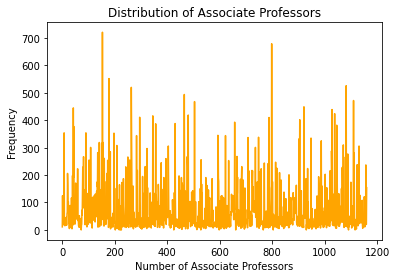

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/aaup.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State", "Type","Salary_Full","Salary_Assoc","Salary_Asst","Salary_All","Comp_Full","Comp_Assoc","Comp_Asst","Comp_All","Num_Full","Num_Assoc","Num_Asst","Num_Instr","Num_All"])

num=len(df[df['Num_Assoc'] > 10])
total=len(df)
p=num/total
print("Probability that a college has more than 10 associate professors: {:.2f}".format(p))
print()

plt.plot(df['Num_Assoc'],color="orange")
plt.title('Distribution of Associate Professors')
plt.xlabel('Number of Associate Professors')
plt.ylabel('Frequency')
plt.show()

QUESTION 3 : What is the probability of  number of colleges depending upon the state with highest average salary for full professor

The probability of the number of colleges in the state with the highest salary is: 0.046511627906976744



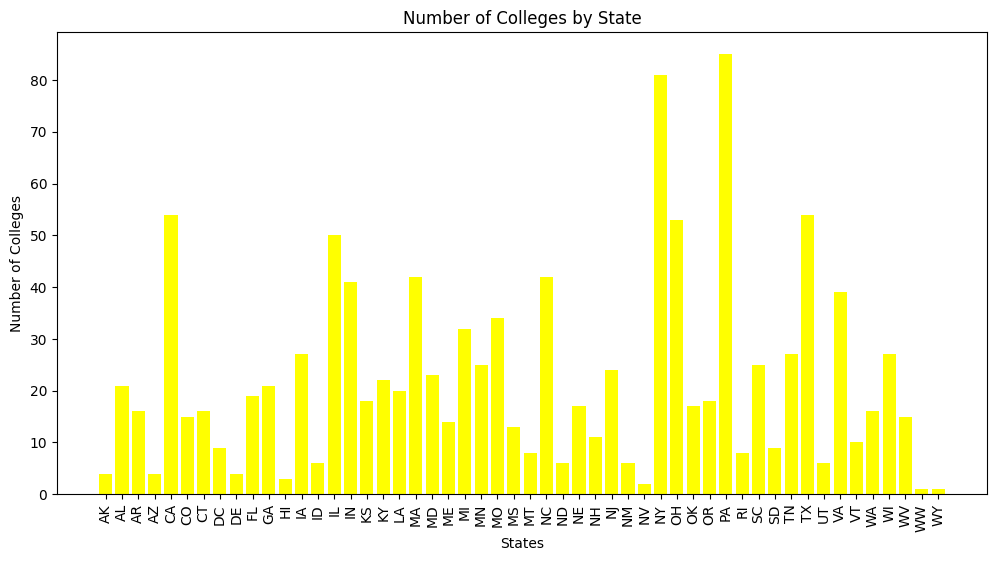

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/aaup.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Type","Salary_Full","Salary_Assoc","Salary_Asst","Salary_All","Comp_Full","Comp_Assoc","Comp_Asst","Comp_All","Num_Full","Num_Assoc","Num_Asst","Num_Instr","Num_All"])

state_sal=df.groupby('State')['Salary_All'].mean() #calculating the average salary for each state

state_high_sal=state_sal.idxmax() #state with the highest average salary for full professor

col_count_state=df.groupby('State')['College'].nunique() #number of colleges in each state

#calculate the probability of the number of colleges in the state with the highest salary
state_high_sal_count=col_count_state[state_high_sal]
total_colleges=col_count_state.sum()
prob_state_with_highest_salary=state_high_sal_count/total_colleges

print("The probability of the number of colleges in the state with the highest salary is:",prob_state_with_highest_salary)
print()

plt.figure(figsize=(12,6))
plt.bar(col_count_state.index,col_count_state.values,color="yellow")
plt.title("Number of Colleges by State")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Number of Colleges")
plt.show()

QUESTION 4 : Suppose we randomly select colleges from the dataset until we find a college that has more than 100 Assistant Professor. What is the expected number of colleges we need to select before finding such a college? (geometrical random distribution)

The expected number of colleges we need to select before finding a college with more than 100 Assistant Professor is: 5.0


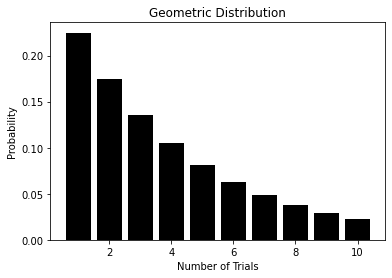

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/aaup.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Type","Salary_Full","Salary_Assoc","Salary_Asst","Salary_All","Comp_Full","Comp_Assoc","Comp_Asst","Comp_All","Num_Full","Num_Assoc","Num_Asst","Num_Instr","Num_All"])

p=(df['Num_Asst']>100).mean()
expected_colleges=1/p

print("The expected number of colleges we need to select before finding a college with more than 100 Assistant Professor is:", (expected_colleges//1)+1)

x=np.arange(1, 11)
y=[(1-p)**(k-1)*p for k in x] #probability for every value of x

plt.bar(x, y,color="black")
plt.title("Geometric Distribution")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.show()

QUESTION 5 : What is the probability that a randomly selected college from the state of Texas has more than 30 full professors? (binomial random distribution)

The probability of a randomly selected college from Texas having more than 30 full professors is: 0.7033006384501113



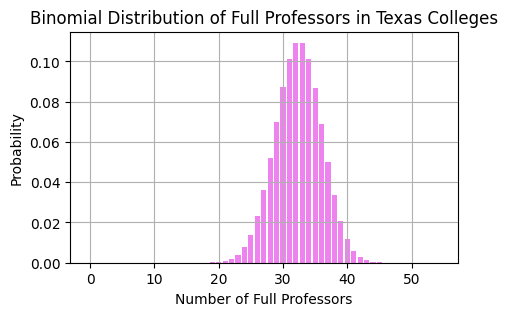

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

url="http://lib.stat.cmu.edu/datasets/colleges/aaup.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Type","Salary_Full","Salary_Assoc","Salary_Asst","Salary_All","Comp_Full","Comp_Assoc","Comp_Asst","Comp_All","Num_Full","Num_Assoc","Num_Asst","Num_Instr","Num_All"])

df_tx=df[df['State']=='TX']
p=0.6 #probability of a college having a full professor
n=df_tx.shape[0] #number of colleges in Texas
prob=1-binom.cdf(k=30, n=n, p=p)

print("The probability of a randomly selected college from Texas having more than 30 full professors is:", prob)
print()

x=np.arange(0,n+1)
pmf=binom.pmf(x,n=n,p=p)
plt.figure(figsize=(5,3))
plt.bar(x,pmf,color="violet")
plt.title("Binomial Distribution of Full Professors in Texas Colleges")
plt.xlabel("Number of Full Professors")
plt.ylabel("Probability")
plt.grid()
plt.show()

QUESTION 6 (Hypothesis) : Students prefer to go to public colleges instead of private as private colleges require more in fees than public.

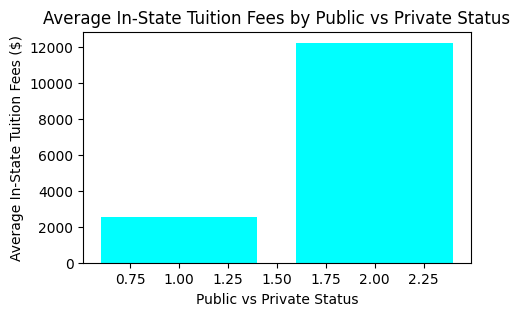

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/usnews.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Public_Private","Avg_Math_Sat_Score","Avg_Ver_Sat_Score","Avg_Comb_Sat_Score","Avg_ACT_Score","1st_Math","3rd_Math","1st_Verb","3rd_Verb","1st_ACT","3rd_ACT","Num_received","Num_accept","Num_enrolled","top_10_students","top_25_students","full_under","part_under","in_state_tution","out_state_tution","room_board_cost","room_cost","board_cost","add_fees","book_cost","personal_spend","faculty_PHD","faculty_terminal","ratio","alumni_donate","inst_expenditure","graduation_rate"])
df.replace("*",np.nan,inplace=True)
df.dropna(inplace=True)

df['Public_Private']=df['Public_Private'].astype(float)
df['in_state_tution']=df['in_state_tution'].astype(float)
tuition=df.groupby('Public_Private')['in_state_tution'].mean()

plt.figure(figsize=(5,3))
plt.bar(tuition.index,tuition.values,color="cyan")
plt.title('Average In-State Tuition Fees by Public vs Private Status')
plt.xlabel('Public vs Private Status')
plt.ylabel('Average In-State Tuition Fees')
plt.show()

QUESTION 7 : Compare the probability that a randomly chosen college from the dataset is located in the state of Texas vs New York and has an average math SAT score above 600? (geometrical)

The probability of selecting a college from Texas with an average math SAT score above 600 on the 5th trial is 0.006326479703586504
The probability of selecting a college from New York with an average math SAT score above 600 on the 3th trial is 0.012651878396523363


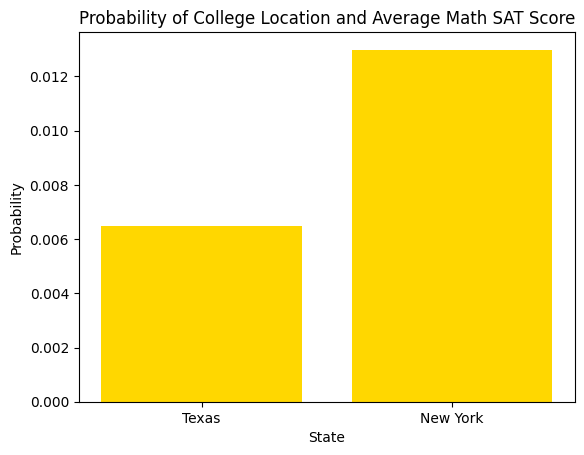

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url="http://lib.stat.cmu.edu/datasets/colleges/usnews.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Public_Private","Avg_Math_Sat_Score","Avg_Ver_Sat_Score","Avg_Comb_Sat_Score","Avg_ACT_Score","1st_Math","3rd_Math","1st_Verb","3rd_Verb","1st_ACT","3rd_ACT","Num_received","Num_accept","Num_enrolled","top_10_students","top_25_students","full_under","part_under","in_state_tution","out_state_tution","room_board_cost","room_cost","board_cost","add_fees","book_cost","personal_spend","faculty_PHD","faculty_terminal","ratio","alumni_donate","inst_expenditure","graduation_rate"])
df.replace("*",np.nan,inplace=True)
df.dropna(inplace=True)

total=len(df)
tx_college=len(df[(df.State=="TX") & (df.Avg_Math_Sat_Score.astype(int)>600)])
ny_college=len(df[(df.State=="NY") & (df.Avg_Math_Sat_Score.astype(int)>600)])

#calculating the probabilities
prob_tx=tx_college/total
prob_ny=ny_college/total

p1=prob_tx
n1=5
prob1=(1-p1)**(n1-1)*p1
print(f"The probability of selecting a college from Texas with an average math SAT score above 600 on the {n1}th trial is {prob1}")

p2=prob_ny
n2=3
prob2=(1-p2)**(n2-1)*p2
print(f"The probability of selecting a college from New York with an average math SAT score above 600 on the {n2}th trial is {prob2}")

plt.bar(["Texas","New York"],[prob_tx,prob_ny],color="gold")
plt.title("Probability of College Location and Average Math SAT Score")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()

QUESTION 8 : What is the probability that a randomly selected college has a graduation rate of at least 80% with student to faculty ratio is less than 15:1?

Probability that a randomly selected college has a graduation rate more than 80% with student to faculty ratio is less than 15:1 is  0.330188679245283


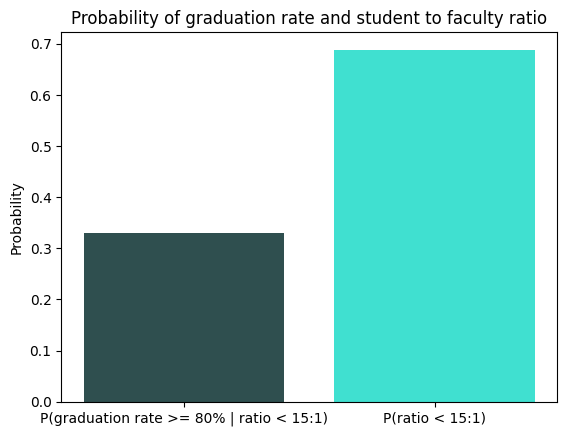

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/usnews.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Public_Private","Avg_Math_Sat_Score","Avg_Ver_Sat_Score","Avg_Comb_Sat_Score","Avg_ACT_Score","1st_Math","3rd_Math","1st_Verb","3rd_Verb","1st_ACT","3rd_ACT","Num_received","Num_accept","Num_enrolled","top_10_students","top_25_students","full_under","part_under","in_state_tution","out_state_tution","room_board_cost","room_cost","board_cost","add_fees","book_cost","personal_spend","faculty_PHD","faculty_terminal","ratio","alumni_donate","inst_expenditure","graduation_rate"])
df.replace("*",pd.NA,inplace=True)
df.dropna(inplace=True)

college=len(df[(df["graduation_rate"].astype(float)>=80) & (df["ratio"].astype(float)<15)])
total_college=len(df[df["ratio"].astype(float)<15])

prob=college/total_college
print("Probability that a randomly selected college has a graduation rate more than 80% with student to faculty ratio is less than 15:1 is ",prob)

plt.bar(["P(graduation rate >= 80% | ratio < 15:1)","P(ratio < 15:1)"],[prob,total_college/len(df)],color=["darkslategrey", "turquoise"])
plt.title("Probability of graduation rate and student to faculty ratio")
plt.ylabel("Probability")
plt.show()

QUESTION 9 (Hypothesis) : The number of colleges in which students have more marks in ACT exam have PHD faculty in there college.

There are 148 colleges with an ACT score greater than 20 and a percentage of faculty with PhDs


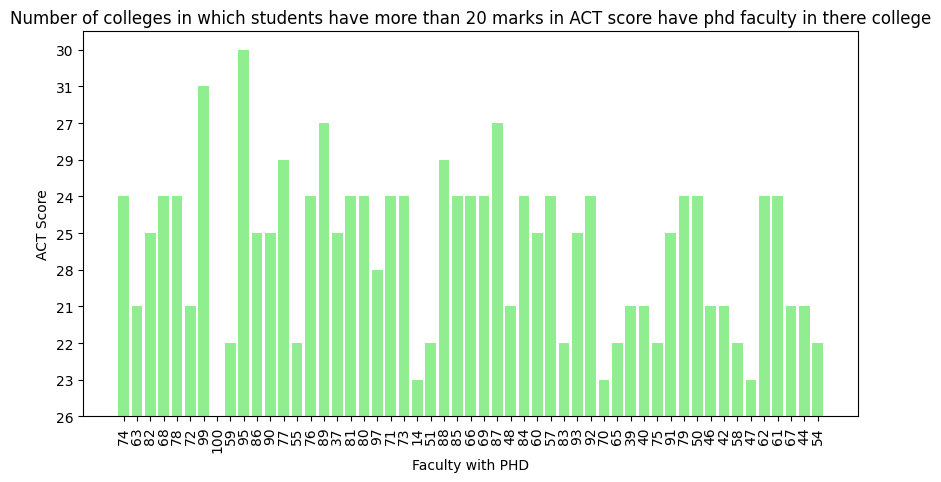

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/usnews.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Public_Private","Avg_Math_Sat_Score","Avg_Ver_Sat_Score","Avg_Comb_Sat_Score","Avg_ACT_Score","1st_Math","3rd_Math","1st_Verb","3rd_Verb","1st_ACT","3rd_ACT","Num_received","Num_accept","Num_enrolled","top_10_students","top_25_students","full_under","part_under","in_state_tution","out_state_tution","room_board_cost","room_cost","board_cost","add_fees","book_cost","personal_spend","faculty_PHD","faculty_terminal","ratio","alumni_donate","inst_expenditure","graduation_rate"])
df.replace("*",pd.NA,inplace=True)
df.dropna(inplace=True)

output=df[(df['Avg_ACT_Score'].astype(float)>20) & (df['faculty_PHD'])]
num_colleges=len(output)
print(f"There are {num_colleges} colleges with an ACT score greater than 20 and a percentage of faculty with PhDs")

plt.figure(figsize=(10,5))
plt.bar(output['faculty_PHD'],output['Avg_ACT_Score'],color="lightgreen")
plt.xlabel("Faculty with PHD")
plt.xticks(rotation=90)
plt.ylabel("ACT Score")
plt.title("Number of colleges in which students have more than 20 marks in ACT score have phd faculty in there college")
plt.show()

QUESTION 10 (Hypothesis) : The enrollement rate, tuition, and room and board prices of a college are all related.

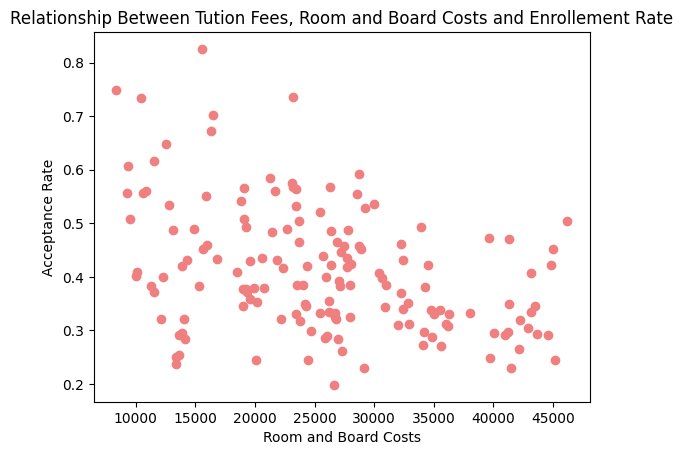

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="http://lib.stat.cmu.edu/datasets/colleges/usnews.data"
df=pd.read_csv(url,header=None,names=["FICE","College","State","Public_Private","Avg_Math_Sat_Score","Avg_Ver_Sat_Score","Avg_Comb_Sat_Score","Avg_ACT_Score","1st_Math","3rd_Math","1st_Verb","3rd_Verb","1st_ACT","3rd_ACT","Num_received","Num_accept","Num_enrolled","top_10_students","top_25_students","full_under","part_under","in_state_tution","out_state_tution","room_board_cost","room_cost","board_cost","add_fees","book_cost","personal_spend","faculty_PHD","faculty_terminal","ratio","alumni_donate","inst_expenditure","graduation_rate"])
df.replace("*",np.nan,inplace=True)
df.dropna(inplace=True)

result=df.dropna(subset=["Num_enrolled","room_cost","board_cost","in_state_tution","out_state_tution"])

plt.scatter(result["room_cost"].astype(int)+result["board_cost"].astype(int)+result["in_state_tution"].astype(int)+result["out_state_tution"].astype(int),result["Num_enrolled"].astype(int)/result["Num_accept"].astype(int),color="lightcoral")
plt.xlabel("Room and Board Costs")
plt.ylabel("Acceptance Rate")
plt.title("Relationship Between Tution Fees, Room and Board Costs and Enrollement Rate")
plt.show()